# 1. Preprocess **Tweets** on **climate change** **2019**

## Import original data

In [ ]:
import pandas as pd
import numpy as np
import re
from tqdm.auto import tqdm

In [ ]:
# load data
df = pd.read_excel("/content/tweets_greta.xlsx")
df.drop_duplicates(subset=["text"],inplace=True)
df.reset_index(drop=True, inplace=True)
df

tweet_id           created_at  \
0     1107179362430836736  2019-03-17 07:18:25   
1     1109128620729982977  2019-03-22 16:24:04   
2     1113715238224965633  2019-04-04 08:09:39   
3     1119376821668261890  2019-04-19 23:06:45   
4     1119376819856257025  2019-04-19 23:06:45   
...                   ...                  ...   
3642  1116926914738802688  2019-04-13 04:51:42   
3643  1112062606561427460  2019-03-30 18:42:41   
3644  1112062629722423297  2019-03-30 18:42:46   
3645  1112062645421641728  2019-03-30 18:42:50   
3646  1107954972094808065  2019-03-19 10:40:24   

                                                   text  
0     오늘은 심한 사람이 있음에도 켐트레일을 뿌리네! 요점은 #기후변화 가 아니라, #기...  
1     පුත්තලම උණුසුම් කළ උද්ඝෝෂණය  \nPuttalam tensed...  
2     Zoljargal, is 1 of the few female entrepreneur...  
3     Zero Foodprint says: Missionstfood is taking o...  
4     Zero Foodprint says: MikkellerBarSF is taking ...  
...                                                 ...  
3642  -SAC, Ahmedabad &amp; ICAR- CMFRI, Kochi sign ...  
3643  -hotter temperatures in the world\n-Rare Hurri...  
3644  -Heavy unusual flooding in California,USA, -Pa...  
3645  -CycloneIdai wreaks havoc in Mozambique,Madaga...  
3646  - and #ClimateChange 🤦🏾‍♀️🤦🏾‍♀️🤦🏾‍♀️ https://t...  

[3647 rows x 3 columns]

## **Translate** by GoogleTranslator

In [ ]:
!pip install --quiet deep-translator
from deep_translator import GoogleTranslator
gt = GoogleTranslator(source='auto', target='en')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 2.7 MB/s eta 0:00:00


In [ ]:
# translate
for i in tqdm(range(len(df))):
  text = df.loc[i,'text']
  df.loc[i,'translated'] = gt.translate(text)

df.dropna(inplace=True) # this simplifies things later on!!!
df.reset_index(drop=True, inplace=True)
df

  0%|          | 0/3647 [00:00<?, ?it/s]

tweet_id           created_at  \
0     1107179362430836736  2019-03-17 07:18:25   
1     1109128620729982977  2019-03-22 16:24:04   
2     1113715238224965633  2019-04-04 08:09:39   
3     1119376821668261890  2019-04-19 23:06:45   
4     1119376819856257025  2019-04-19 23:06:45   
...                   ...                  ...   
3642  1116926914738802688  2019-04-13 04:51:42   
3643  1112062606561427460  2019-03-30 18:42:41   
3644  1112062629722423297  2019-03-30 18:42:46   
3645  1112062645421641728  2019-03-30 18:42:50   
3646  1107954972094808065  2019-03-19 10:40:24   

                                                   text  \
0     오늘은 심한 사람이 있음에도 켐트레일을 뿌리네! 요점은 #기후변화 가 아니라, #기...   
1     පුත්තලම උණුසුම් කළ උද්ඝෝෂණය  \nPuttalam tensed...   
2     Zoljargal, is 1 of the few female entrepreneur...   
3     Zero Foodprint says: Missionstfood is taking o...   
4     Zero Foodprint says: MikkellerBarSF is taking ...   
...                                                 ...   
3642  -SAC, Ahmedabad &amp; ICAR- CMFRI, Kochi sign ...   
3643  -hotter temperatures in the world\n-Rare Hurri...   
3644  -Heavy unusual flooding in California,USA, -Pa...   
3645  -CycloneIdai wreaks havoc in Mozambique,Madaga...   
3646  - and #ClimateChange 🤦🏾‍♀️🤦🏾‍♀️🤦🏾‍♀️ https://t...   

                                             translated  
0     Today, even though there are severe people, th...  
1     The protest that heated up Puttalam  \nPuttala...  
2     Zoljargal, is 1 of the few female entrepreneur...  
3     Zero Foodprint says: Missionstfood is taking o...  
4     Zero Foodprint says: MikkellerBarSF is taking ...  
...                                                 ...  
3642  -SAC, Ahmedabad &amp; ICAR- CMFRI, Kochi sign ...  
3643  -hotter temperatures in the world\n-Rare Hurri...  
3644  -Heavy unusual flooding in California,USA, -Pa...  
3645  -CycloneIdai wreaks havoc in Mozambique,Madaga...  
3646  - and #ClimateChange 🤦🏾‍♀️🤦🏾‍♀️🤦🏾‍♀️ https://t...  

[3647 rows x 4 columns]

## Extract **emotions**

In [ ]:
# https://huggingface.co/cardiffnlp/twitter-roberta-large-emotion-latest
#
from transformers import pipeline
pipe = pipeline('text-classification',
                model="cardiffnlp/twitter-roberta-large-emotion-latest",
                return_all_scores=True)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

Device set to use cpu
/usr/local/lib/python3.12/dist-packages/transformers/pipelines/text_classification.py:111: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [ ]:
# get emotions
for i in tqdm(range(len(df))):
  text = df.loc[i,'translated']
  predictions = pipe(text)[0]
  for j in range(len(predictions)):
    df.loc[i, predictions[j]['label']] = round(predictions[j]['score'],4)

df

  0%|          | 0/3647 [00:00<?, ?it/s]

tweet_id           created_at  \
0     1107179362430836736  2019-03-17 07:18:25   
1     1109128620729982977  2019-03-22 16:24:04   
2     1113715238224965633  2019-04-04 08:09:39   
3     1119376821668261890  2019-04-19 23:06:45   
4     1119376819856257025  2019-04-19 23:06:45   
...                   ...                  ...   
3642  1116926914738802688  2019-04-13 04:51:42   
3643  1112062606561427460  2019-03-30 18:42:41   
3644  1112062629722423297  2019-03-30 18:42:46   
3645  1112062645421641728  2019-03-30 18:42:50   
3646  1107954972094808065  2019-03-19 10:40:24   

                                                   text  \
0     오늘은 심한 사람이 있음에도 켐트레일을 뿌리네! 요점은 #기후변화 가 아니라, #기...   
1     පුත්තලම උණුසුම් කළ උද්ඝෝෂණය  \nPuttalam tensed...   
2     Zoljargal, is 1 of the few female entrepreneur...   
3     Zero Foodprint says: Missionstfood is taking o...   
4     Zero Foodprint says: MikkellerBarSF is taking ...   
...                                                 ...   
3642  -SAC, Ahmedabad &amp; ICAR- CMFRI, Kochi sign ...   
3643  -hotter temperatures in the world\n-Rare Hurri...   
3644  -Heavy unusual flooding in California,USA, -Pa...   
3645  -CycloneIdai wreaks havoc in Mozambique,Madaga...   
3646  - and #ClimateChange 🤦🏾‍♀️🤦🏾‍♀️🤦🏾‍♀️ https://t...   

                                             translated   anger  anticipation  \
0     Today, even though there are severe people, th...  0.6113        0.1662   
1     The protest that heated up Puttalam  \nPuttala...  0.7901        0.0514   
2     Zoljargal, is 1 of the few female entrepreneur...  0.0051        0.2452   
3     Zero Foodprint says: Missionstfood is taking o...  0.0097        0.2002   
4     Zero Foodprint says: MikkellerBarSF is taking ...  0.0089        0.2342   
...                                                 ...     ...           ...   
3642  -SAC, Ahmedabad &amp; ICAR- CMFRI, Kochi sign ...  0.0047        0.4811   
3643  -hotter temperatures in the world\n-Rare Hurri...  0.2144        0.0391   
3644  -Heavy unusual flooding in California,USA, -Pa...  0.0226        0.1482   
3645  -CycloneIdai wreaks havoc in Mozambique,Madaga...  0.4462        0.0306   
3646  - and #ClimateChange 🤦🏾‍♀️🤦🏾‍♀️🤦🏾‍♀️ https://t...  0.8796        0.0648   

      disgust    fear     joy    love  optimism  pessimism  sadness  surprise  \
0      0.7243  0.0597  0.0072  0.0014    0.0841     0.0282   0.0352    0.0190   
1      0.4561  0.2133  0.0076  0.0024    0.0128     0.0118   0.2687    0.0075   
2      0.0128  0.2678  0.6775  0.0388    0.9876     0.0181   0.0543    0.0372   
3      0.0117  0.0049  0.9841  0.0956    0.9671     0.0031   0.0058    0.0197   
4      0.0121  0.0050  0.9825  0.0925    0.9633     0.0031   0.0064    0.0200   
...       ...     ...     ...     ...       ...        ...      ...       ...   
3642   0.0174  0.1527  0.1790  0.0071    0.8608     0.0158   0.0575    0.0211   
3643   0.2355  0.9942  0.0095  0.0060    0.0078     0.1769   0.7117    0.0447   
3644   0.0337  0.6617  0.2806  0.0084    0.0469     0.0307   0.3385    0.2909   
3645   0.5352  0.9606  0.0079  0.0025    0.0034     0.1244   0.7937    0.0346   
3646   0.8653  0.4491  0.0249  0.0012    0.0060     0.0579   0.5032    0.0675   

       trust  
0     0.0070  
1     0.0031  
2     0.2542  
3     0.0813  
4     0.0830  
...      ...  
3642  0.0564  
3643  0.0080  
3644  0.0117  
3645  0.0040  
3646  0.0025  

[3647 rows x 15 columns]

## **Save** result

In [ ]:
df = df.astype({'tweet_id': str})
df.to_excel("/content/tweets_greta_translated.xlsx", index=False)

# 2. Build the **semantic** network

## Import **preprocessed** data

In [1]:
import pandas as pd
import numpy as np
import re
from tqdm.auto import tqdm

In [2]:
# load data
df = pd.read_excel("/content/tweets_greta_translated.xlsx")
df.drop_duplicates(subset=["text"],inplace=True)
df.reset_index(drop=True, inplace=True)
df

tweet_id           created_at  \
0     1107179362430836736  2019-03-17 07:18:25   
1     1109128620729982977  2019-03-22 16:24:04   
2     1113715238224965633  2019-04-04 08:09:39   
3     1119376821668261890  2019-04-19 23:06:45   
4     1119376819856257025  2019-04-19 23:06:45   
...                   ...                  ...   
3642  1116926914738802688  2019-04-13 04:51:42   
3643  1112062606561427460  2019-03-30 18:42:41   
3644  1112062629722423297  2019-03-30 18:42:46   
3645  1112062645421641728  2019-03-30 18:42:50   
3646  1107954972094808065  2019-03-19 10:40:24   

                                                   text  \
0     오늘은 심한 사람이 있음에도 켐트레일을 뿌리네! 요점은 #기후변화 가 아니라, #기...   
1     පුත්තලම උණුසුම් කළ උද්ඝෝෂණය  \nPuttalam tensed...   
2     Zoljargal, is 1 of the few female entrepreneur...   
3     Zero Foodprint says: Missionstfood is taking o...   
4     Zero Foodprint says: MikkellerBarSF is taking ...   
...                                                 ...   
3642  -SAC, Ahmedabad &amp; ICAR- CMFRI, Kochi sign ...   
3643  -hotter temperatures in the world\n-Rare Hurri...   
3644  -Heavy unusual flooding in California,USA, -Pa...   
3645  -CycloneIdai wreaks havoc in Mozambique,Madaga...   
3646  - and #ClimateChange 🤦🏾‍♀️🤦🏾‍♀️🤦🏾‍♀️ https://t...   

                                             translated   anger  anticipation  \
0     Today, even though there are severe people, th...  0.6113        0.1662   
1     The protest that heated up Puttalam  \nPuttala...  0.7901        0.0514   
2     Zoljargal, is 1 of the few female entrepreneur...  0.0051        0.2452   
3     Zero Foodprint says: Missionstfood is taking o...  0.0097        0.2002   
4     Zero Foodprint says: MikkellerBarSF is taking ...  0.0089        0.2342   
...                                                 ...     ...           ...   
3642  -SAC, Ahmedabad &amp; ICAR- CMFRI, Kochi sign ...  0.0047        0.4811   
3643  -hotter temperatures in the world\n-Rare Hurri...  0.2144        0.0391   
3644  -Heavy unusual flooding in California,USA, -Pa...  0.0226        0.1482   
3645  -CycloneIdai wreaks havoc in Mozambique,Madaga...  0.4462        0.0306   
3646  - and #ClimateChange 🤦🏾‍♀️🤦🏾‍♀️🤦🏾‍♀️ https://t...  0.8796        0.0648   

      disgust    fear     joy    love  optimism  pessimism  sadness  surprise  \
0      0.7243  0.0597  0.0072  0.0014    0.0841     0.0282   0.0352    0.0190   
1      0.4561  0.2133  0.0076  0.0024    0.0128     0.0118   0.2687    0.0075   
2      0.0128  0.2678  0.6775  0.0388    0.9876     0.0181   0.0543    0.0372   
3      0.0117  0.0049  0.9841  0.0956    0.9671     0.0031   0.0058    0.0197   
4      0.0121  0.0050  0.9825  0.0925    0.9633     0.0031   0.0064    0.0200   
...       ...     ...     ...     ...       ...        ...      ...       ...   
3642   0.0174  0.1527  0.1790  0.0071    0.8608     0.0158   0.0575    0.0211   
3643   0.2355  0.9942  0.0095  0.0060    0.0078     0.1769   0.7117    0.0447   
3644   0.0337  0.6617  0.2806  0.0084    0.0469     0.0307   0.3385    0.2909   
3645   0.5352  0.9606  0.0079  0.0025    0.0034     0.1244   0.7937    0.0346   
3646   0.8653  0.4491  0.0249  0.0012    0.0060     0.0579   0.5032    0.0675   

       trust  
0     0.0070  
1     0.0031  
2     0.2542  
3     0.0813  
4     0.0830  
...      ...  
3642  0.0564  
3643  0.0080  
3644  0.0117  
3645  0.0040  
3646  0.0025  

[3647 rows x 15 columns]

## Let's prepare a function to clean text, based on **SpaCy**

In [3]:
import spacy
!pip install --quiet spacymoji
from spacymoji import Emoji
nlp = spacy.load('en_core_web_sm')
nlp.tokenizer.token_match = re.compile("^#\w+$").match
nlp.add_pipe("emoji", first=True)

import emoji
def get_emoji_regexp():
    # Sort emoji by length to make sure multi-character emojis are
    # matched first
    emojis = sorted(emoji.EMOJI_DATA, key=len, reverse=True)
    pattern = '(' + '|'.join(re.escape(u) for u in emojis) + ')'
    return re.compile(pattern)

<>:5: SyntaxWarning: invalid escape sequence '\w'
<>:5: SyntaxWarning: invalid escape sequence '\w'
/tmp/ipython-input-4268926626.py:5: SyntaxWarning: invalid escape sequence '\w'
  nlp.tokenizer.token_match = re.compile("^#\w+$").match


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.4/608.4 kB 10.1 MB/s eta 0:00:00


In [4]:
# a function to clean text that uses what we have seen in the spacy lab
#
# with text_form you can choose the external format (list or text)
#
# with to_keep you can choose if you want to keep or remove certain PoS
#
# with kr_list you can choose which POS tags to keep or remove,
# to be chosen from the following list
#
# Universal POS Tags http://universaldependencies.org/u/pos/
#
#   "ADJ": "adjective",
#   "ADP": "adposition",
#   "ADV": "adverb",
#   "AUX": "auxiliary",
#   "CONJ": "conjunction",
#   "CCONJ": "coordinating conjunction",
#   "DET": "determiner",
#   "INTJ": "interjection",
#   "NOUN": "noun",
#   "NUM": "numeral",
#   "PART": "particle",
#   "PRON": "pronoun",
#   "PROPN": "proper noun",
#   "PUNCT": "punctuation",
#   "SCONJ": "subordinating conjunction",
#   "SYM": "symbol",
#   "VERB": "verb",
#   "X": "other",
#   "EOL": "end of line",
#   "SPACE": "space"
#
# Internal tags
#
#   "EMOJI" emojis,
#   "HASH" hastags
#   "HTML" web links,
#   "MENT" mentions
#
def clean_text(text, text_form=True, to_keep=True,
               kr_list = ["ADJ","ADV","EMOJI","HASH","NOUN","PROPN","VERB"]):

    # apply spacy
    doc = nlp(" ".join(get_emoji_regexp().split(text)))
    # collect spacy outomes in in a list
    out = list()
    for token in doc:
        out.append((token.text, token.text+token.whitespace_,
                    token.lemma_.lower(), token.pos_,
                    token.text.startswith("#"),
                    token.text.startswith("@"),
                    emoji.purely_emoji(token.text),
                    (token.text.startswith("https:") or token.text.startswith("http:"))
                    ))
    # turn it into a dataframe
    df2 = pd.DataFrame(out)
    df2.columns = ['text', 'full_text', 'lemma', 'PoS',
                   'is_hashtag', 'is_mention', 'is_emoji', 'is_link']
    # build a PoS column that identifies hashtags, mentions, etc
    df2.insert(loc = 4, column = 'myPoS', value = df2['PoS'])
    df2.loc[df2['is_hashtag']==True,'myPoS'] = 'HASH'
    df2.loc[df2['is_mention']==True,'myPoS'] = 'MENT'
    df2.loc[df2['is_emoji']==True,'myPoS'] = 'EMOJI'
    df2.loc[df2['is_link']==True,'myPoS'] = 'HTML'
    # replace emojis lemmas with their description
    for tmp in doc._.emoji:
      df2.loc[tmp[1],'lemma'] = tmp[0]+" "+tmp[2]
    # keep/remove only what is asked
    if text_form:
      if to_keep:
        out = [j for (i,j) in zip(df2['myPoS'],df2['full_text']) if i in kr_list]
      else:
        out = [j for (i,j) in zip(df2['myPoS'],df2['full_text']) if i not in kr_list]
      return "".join(out)
    else:
      if to_keep:
        out = [j for (i,j) in zip(df2['myPoS'],df2['lemma']) if i in kr_list]
      else:
        out = [j for (i,j) in zip(df2['myPoS'],df2['lemma']) if i not in kr_list]
      return out

## **Clean** text

In [5]:
# it takes a few minutes!!! around 4
for i in tqdm(range(len(df))):
  text = df.loc[i,'translated']
  df.loc[i,'clean text'] = clean_text(text, text_form=True,
                                         to_keep=True,
                                         kr_list=["PRON","ADJ","ADV","HASH","NOUN","PROPN","VERB"])
  df.loc[[i],'clean list'] = pd.Series([
                             clean_text(text, text_form=False,
                                              to_keep=True,
                                              kr_list=["PRON","ADJ","ADV","HASH","NOUN","PROPN","VERB"])
                             ], index=[i])
df

  0%|          | 0/3647 [00:00<?, ?it/s]

tweet_id           created_at  \
0     1107179362430836736  2019-03-17 07:18:25   
1     1109128620729982977  2019-03-22 16:24:04   
2     1113715238224965633  2019-04-04 08:09:39   
3     1119376821668261890  2019-04-19 23:06:45   
4     1119376819856257025  2019-04-19 23:06:45   
...                   ...                  ...   
3642  1116926914738802688  2019-04-13 04:51:42   
3643  1112062606561427460  2019-03-30 18:42:41   
3644  1112062629722423297  2019-03-30 18:42:46   
3645  1112062645421641728  2019-03-30 18:42:50   
3646  1107954972094808065  2019-03-19 10:40:24   

                                                   text  \
0     오늘은 심한 사람이 있음에도 켐트레일을 뿌리네! 요점은 #기후변화 가 아니라, #기...   
1     පුත්තලම උණුසුම් කළ උද්ඝෝෂණය  \nPuttalam tensed...   
2     Zoljargal, is 1 of the few female entrepreneur...   
3     Zero Foodprint says: Missionstfood is taking o...   
4     Zero Foodprint says: MikkellerBarSF is taking ...   
...                                                 ...   
3642  -SAC, Ahmedabad &amp; ICAR- CMFRI, Kochi sign ...   
3643  -hotter temperatures in the world\n-Rare Hurri...   
3644  -Heavy unusual flooding in California,USA, -Pa...   
3645  -CycloneIdai wreaks havoc in Mozambique,Madaga...   
3646  - and #ClimateChange 🤦🏾‍♀️🤦🏾‍♀️🤦🏾‍♀️ https://t...   

                                             translated   anger  anticipation  \
0     Today, even though there are severe people, th...  0.6113        0.1662   
1     The protest that heated up Puttalam  \nPuttala...  0.7901        0.0514   
2     Zoljargal, is 1 of the few female entrepreneur...  0.0051        0.2452   
3     Zero Foodprint says: Missionstfood is taking o...  0.0097        0.2002   
4     Zero Foodprint says: MikkellerBarSF is taking ...  0.0089        0.2342   
...                                                 ...     ...           ...   
3642  -SAC, Ahmedabad &amp; ICAR- CMFRI, Kochi sign ...  0.0047        0.4811   
3643  -hotter temperatures in the world\n-Rare Hurri...  0.2144        0.0391   
3644  -Heavy unusual flooding in California,USA, -Pa...  0.0226        0.1482   
3645  -CycloneIdai wreaks havoc in Mozambique,Madaga...  0.4462        0.0306   
3646  - and #ClimateChange 🤦🏾‍♀️🤦🏾‍♀️🤦🏾‍♀️ https://t...  0.8796        0.0648   

      disgust    fear     joy    love  optimism  pessimism  sadness  surprise  \
0      0.7243  0.0597  0.0072  0.0014    0.0841     0.0282   0.0352    0.0190   
1      0.4561  0.2133  0.0076  0.0024    0.0128     0.0118   0.2687    0.0075   
2      0.0128  0.2678  0.6775  0.0388    0.9876     0.0181   0.0543    0.0372   
3      0.0117  0.0049  0.9841  0.0956    0.9671     0.0031   0.0058    0.0197   
4      0.0121  0.0050  0.9825  0.0925    0.9633     0.0031   0.0064    0.0200   
...       ...     ...     ...     ...       ...        ...      ...       ...   
3642   0.0174  0.1527  0.1790  0.0071    0.8608     0.0158   0.0575    0.0211   
3643   0.2355  0.9942  0.0095  0.0060    0.0078     0.1769   0.7117    0.0447   
3644   0.0337  0.6617  0.2806  0.0084    0.0469     0.0307   0.3385    0.2909   
3645   0.5352  0.9606  0.0079  0.0025    0.0034     0.1244   0.7937    0.0346   
3646   0.8653  0.4491  0.0249  0.0012    0.0060     0.0579   0.5032    0.0675   

       trust                                         clean text  \
0     0.0070  Todayeven there are severe peoplethey spraying...   
1     0.0031  protest that heated Puttalam Puttalam tensed p...   
2     0.2542  Zoljargalfew female entrepreneurs her region M...   
3     0.0813  Zero Foodprint saysMissionstfood taking #clima...   
4     0.0830  Zero Foodprint saysMikkellerBarSF taking #clim...   
...      ...                                                ...   
3642  0.0564  Ahmedabad ampCMFRIKochi sign MoU mapvalidatepr...   
3643  0.0080  -hotter temperatures world-Rare Hurricane wrea...   
3644  0.0117  -Heavy unusual flooding CaliforniaUSA-Paraguay...   
3645  0.0040  -CycloneIdai wreaks havoc MozambiqueMadagascar...   
3646  0.0025            

## Function to build **dictionary** and **occurrence matrix**

In [9]:
import time
from scipy.sparse import csr_matrix
import scipy.sparse as sps

In [7]:
# extracts occurrence matrix Nwd, also returns the
# documents actually in use and the words dictionary
#
# words occurring less than n_min times are discarded
# words occurring more than n_max times are discarded
#
# documents with zero active words are discarded

def get_Nwd(clean_texts_list, n_min=2, n_max=1e10):

    # capture execution time
    tic = time.time()

    # collection of (unique) words
    words = np.unique([item for sublist in clean_texts_list \
                            for item in sublist])
    Nw = len(words) # number of words (so far)
    # documents list
    Nd = len(clean_texts_list) # number of documents (so far)
    documents = np.array(range(Nd))

    # occurrence matrix for words in documents
    words_dict = dict(zip(words,range(Nw))) # words dictionary
    Nwd = csr_matrix((Nw, Nd), dtype = np.int8).toarray()
    for i in range(Nd):
        for j in clean_texts_list[i]:
            Nwd[words_dict[j],i] += 1

    # identify words used less than n_min or more than n_max
    select = ((np.sum(Nwd,axis=1) >= n_min) & \
              (np.sum(Nwd,axis=1) < n_max))
    # explicitly print the most frequent ones
    print('removing words...')
    with np.printoptions(threshold=np.inf):
      print(words[(np.sum(Nwd,axis=1)>=n_max)])
    # remove them
    Nwd = Nwd[select,:]
    words = words[select]
    # remove documents that do not contain words
    select = (np.sum(Nwd,axis=0)>0)
    Nwd = csr_matrix(Nwd[:,select])
    documents = documents[select]

    # capture execution time
    print(f'Occurrence matrix: execution time {time.time()-tic} [s]')

    return Nwd, words, documents

## Extract and inspect the **occurrence matrix**

In [22]:
# extract occurrence matrix
Nwd, words, documents = get_Nwd(list(df['clean list']),
                                n_min = 5, n_max = 500)
# see matrix dimension
Nwd

removing words...
['#' '#climate' '#climatechange' 'amp' 'climate' 'it' 'our' 'we' 'you']
Occurrence matrix: execution time 0.5806369781494141 [s]


<Compressed Sparse Row sparse matrix of dtype 'int8'
	with 44854 stored elements and shape (2100, 3635)>

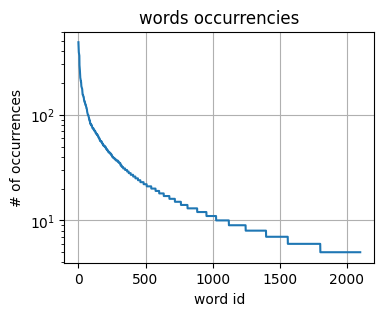

In [24]:
# plot words occurrences
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 3))
plt.semilogy(-np.sort(-np.asarray(np.sum(Nwd,axis=1)).reshape(-1)))
plt.grid(True)
plt.xlabel('word id')
plt.ylabel('# of occurrences')
plt.title("words occurrencies");

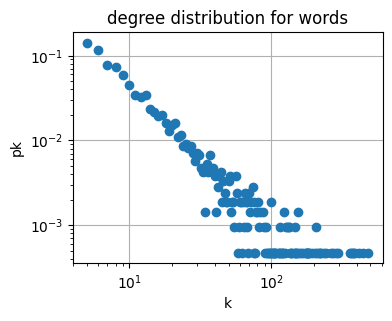

In [29]:
# plot words degree distribution
dw = np.squeeze(np.asarray(Nwd.sum(axis=1))) # words degrees
# degree distribution
k = np.unique(dw)
pk = np.histogram(dw,np.append(k,k[-1]+1))[0]
pk = pk/pk.sum()
Pk = 1-np.cumsum(pk)
# plot
fig = plt.figure(figsize=(4, 3))
plt.loglog(k,pk,'o')
plt.title("degree distribution for words")
plt.xlabel("k")
plt.ylabel("pk")
plt.grid(True)
plt.show()

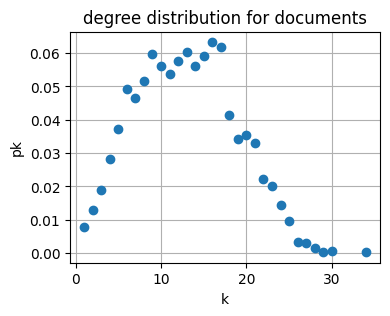

In [32]:
# plot documents degree distribution
dw = np.squeeze(np.asarray(Nwd.sum(axis=0))) # words degrees
# degree distribution
k = np.unique(dw)
pk = np.histogram(dw,np.append(k,k[-1]+1))[0]
pk = pk/pk.sum()
Pk = 1-np.cumsum(pk)
# plot
fig = plt.figure(figsize=(4, 3))
plt.plot(k,pk,'o')
plt.title("degree distribution for documents")
plt.xlabel("k")
plt.ylabel("pk")
plt.grid(True)
plt.show()

## Build **projection** matrices

In [25]:
# equally likely documents case!
Pwd = Nwd/Nwd.sum(axis=0).flatten()/Nwd.shape[1]
# words and document matrices
pd = Pwd.sum(axis=0).flatten()
Pww = (Pwd/pd).dot(Pwd.T)
pw = Pwd.sum(axis=1).flatten()
Pdd = (Pwd.T/pw).dot(Pwd)

In [28]:
# save the result in pickle format
import pickle
with open("/content/semantic_net.pkl", 'wb') as f:
    pickle.dump({
        'words': words,
        'documents': documents,
        'Nwd': Nwd,
        'Pwd': Pwd,
        'Pww': Pww,
        'Pdd': Pdd,
        'pd': pd,
        'pw': pw
    }, f)

In [59]:
# export the document network in Gephi format
import pandas
(i,j) = Pdd.nonzero()
k = Pdd.data
pandas.DataFrame(data={'source':i,'target':j,'weight':10*k/k.max()})


source  target    weight
0             0    3576  0.010493
1             0    3519  0.013991
2             0    3418  0.005246
3             0    3245  0.004664
4             0    3159  0.006995
...         ...     ...       ...
3006474    3634     571  0.015100
3006475    3634     552  0.017932
3006476    3634     542  0.020493
3006477    3634     498  0.040987
3006478    3634     393  0.017932

[3006479 rows x 3 columns]

# 3. Use the **semantic** network

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
import umap
import matplotlib
import matplotlib.pyplot as plt

In [4]:
!pip install --quiet igraph
import igraph as ig

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 47.9 MB/s eta 0:00:00


In [10]:
# load stored data
with open("/content/semantic_net.pkl", 'rb') as f:
    in_data = pickle.load(f)

## Let's plot a **word cloud**

In [72]:
# get words info first
words = in_data['words']
Pww = in_data['Pww'] # adjacency matrix
pw = in_data['pw'] # words probability, it is as a centrality measure
pw = np.array(pw)[0]/pw.max() # set the maximum to 1

In [79]:
# get nodes coordinates by umap on Pww
%time t_pos = umap.UMAP().fit_transform(Pww.toarray())
t_pos = t_pos-t_pos.mean(0) # we subtract the average values here

CPU times: user 8.41 s, sys: 32.3 ms, total: 8.44 s
Wall time: 7.49 s


In [80]:
# do a selection of the most prominent 100 words
select = np.array(pw.argsort()[-100:][::-1])
s_words = words[select]
s_pw = pw[select]
s_Pww = Pww[select,:][:,select]
s_pos = t_pos[select,:]

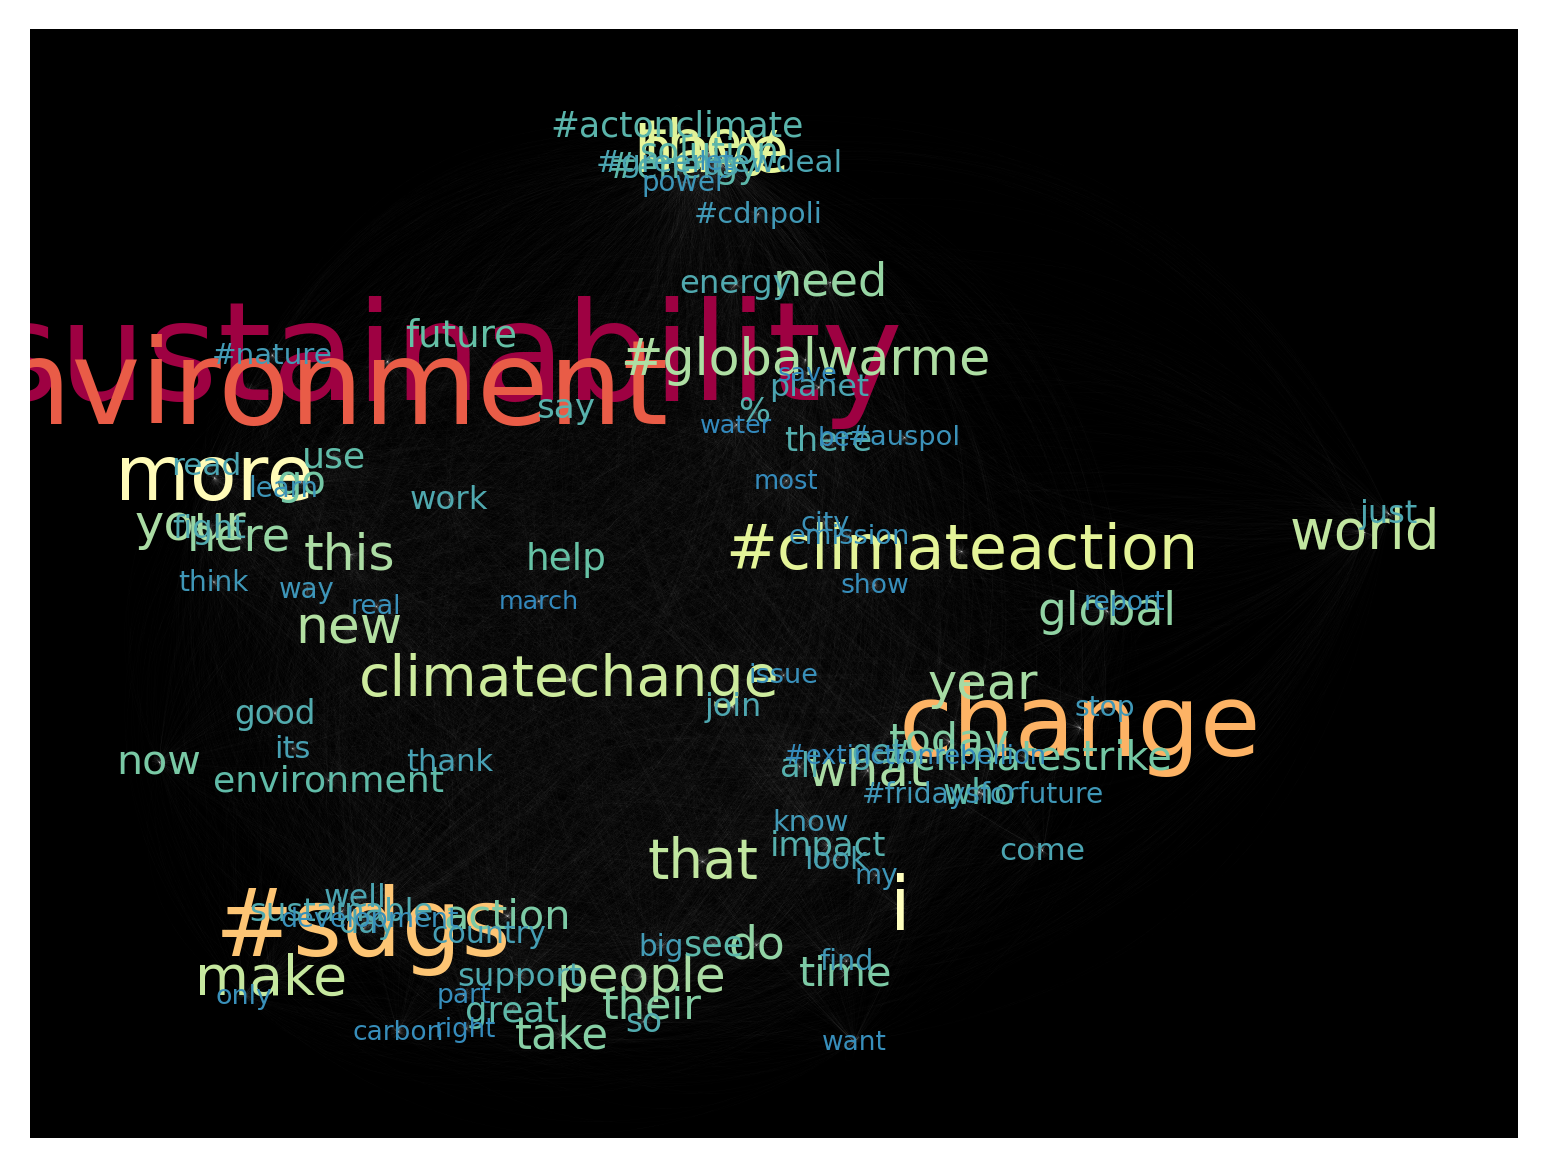

In [81]:
# build graph using Pww
G = ig.Graph.Adjacency((s_Pww.toarray()>0).tolist())

# set word label properties
G.vs['label'] = s_words
G.vs['label_size'] = 30*s_pw+3
G.vs['label_dist'] = 0
# and color
pa = sns.color_palette("Spectral", as_cmap=True)
G.vs['label_color'] = list(map(matplotlib.colors.rgb2hex, pa(1-s_pw)))

# plot graph
fig, ax = plt.subplots(dpi=300)
ax.patch.set_facecolor('black')
ig.plot(G,
        target = ax,
        layout = s_pos,
        vertex_size = 0,
        vertex_color = 'white',
        edge_width = 0.001, # no edges
        edge_color = 'white', # no edges
        edge_arrow_size = 0.001 # super small arrow not to see it
        );


## Let's do something on **documents**

In [82]:
# get documents info first
documents = in_data['documents']
Pdd = in_data['Pdd'] # adjacency matrix

# but as a centrality measure we should get something
# meaningful, e.g., the anger value
df2 = pd.read_excel("/content/tweets_greta_translated.xlsx")
anger = np.array(df2['anger'])[documents]

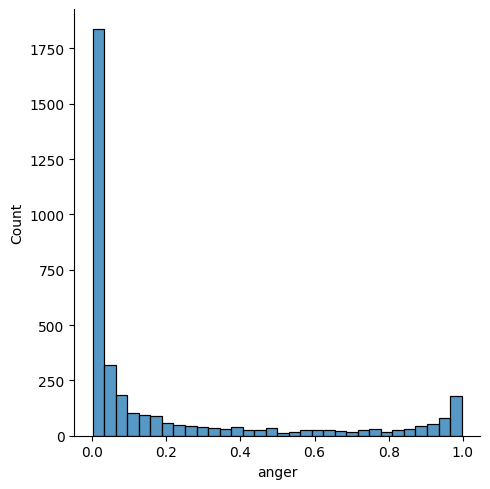

In [85]:
sns.displot(df2, x="anger");

In [87]:
# get nodes coordinates by umap on Pww
# might take a while, there are many documents!
A = in_data['Pwd'].T/np.sqrt(in_data['pw']) # this is a trick!
%time t_pos = umap.UMAP(metric="cosine").fit_transform(A.toarray())
t_pos = t_pos-t_pos.mean(0) # we subtract the average values here

CPU times: user 29.1 s, sys: 181 ms, total: 29.2 s
Wall time: 27.5 s


In [88]:
# do a selection on the most angry docs
select = np.where(anger>.1)[0]
s_an = anger[select]
s_Pdd = Pdd[select,:][:,select]
s_pos = t_pos[select,:]

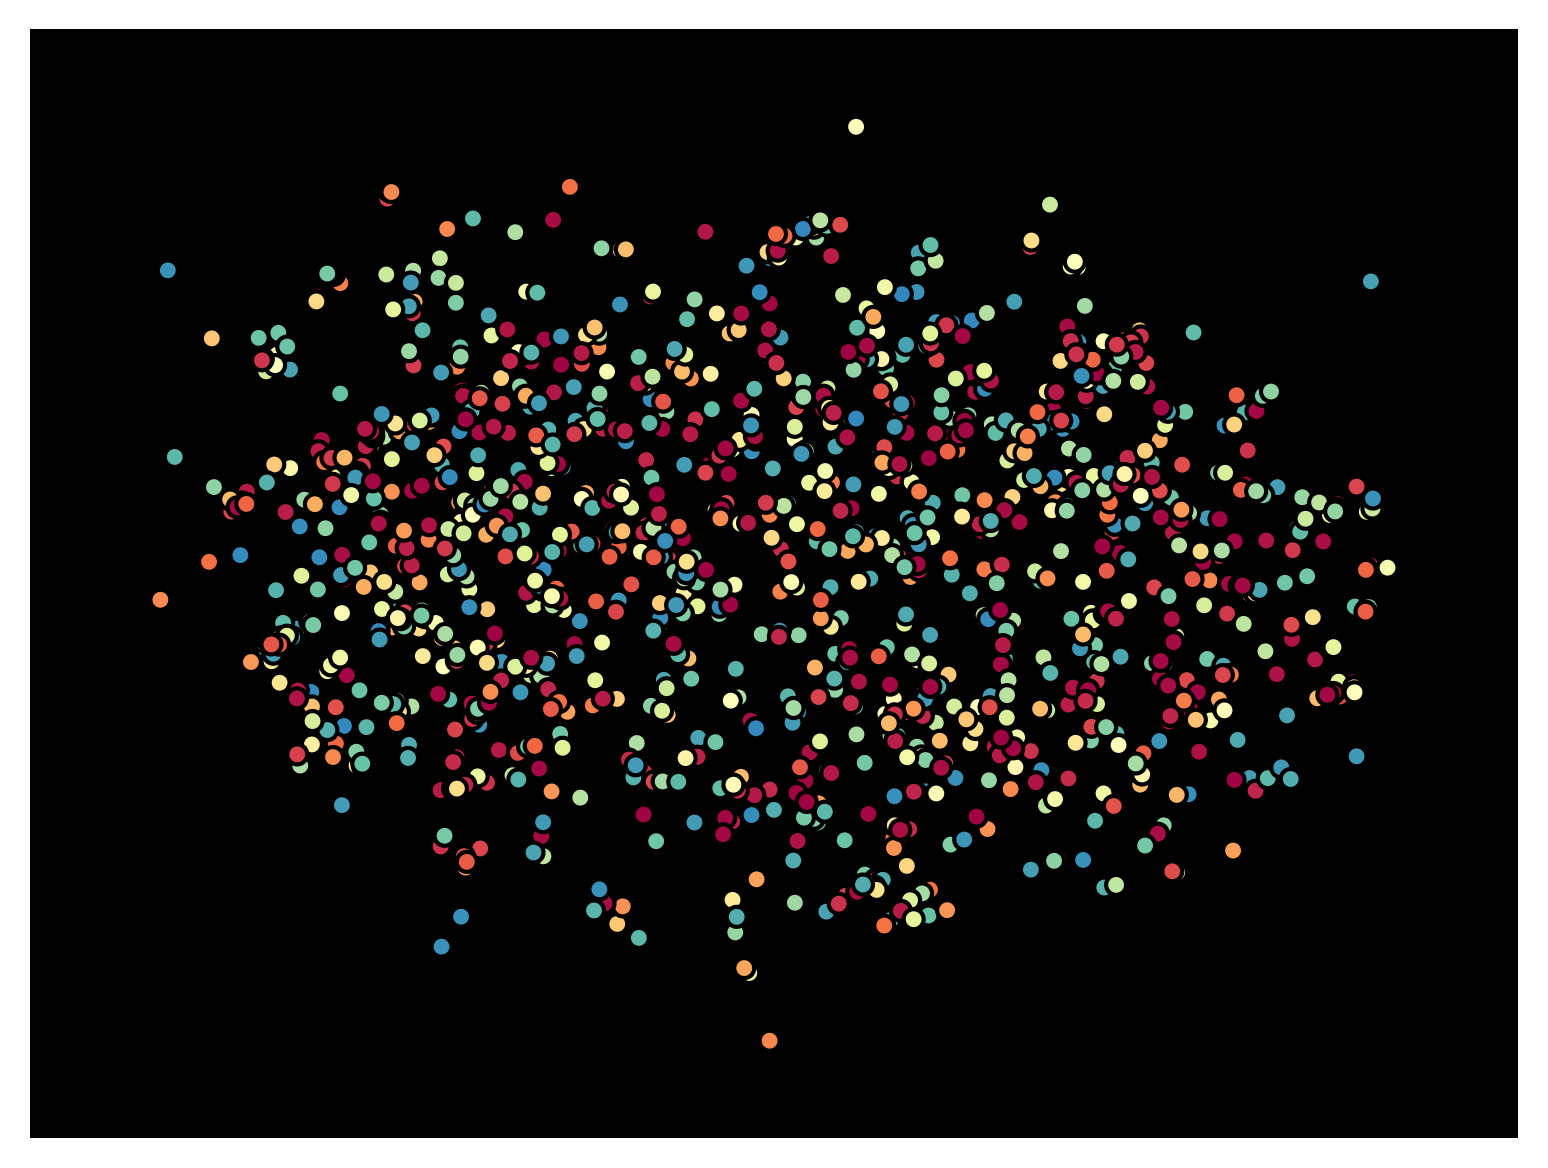

In [89]:
# build graph using Pdd
# again, it is big and it takes a while to plot!!!
# better use Gephi for this one!
G = ig.Graph.Adjacency((s_Pdd.toarray()>0).tolist())

# set document color properties
pa = sns.color_palette("Spectral", as_cmap=True)
G.vs['color'] = list(map(matplotlib.colors.rgb2hex, pa(1-s_an)))

# plot graph
fig, ax = plt.subplots(dpi=300)
ax.patch.set_facecolor('black')
ig.plot(G,
        target = ax,
        layout = s_pos,
        vertex_size = 20,
        edge_width = 0, # no edges
        edge_color = 'white', # no edges
        edge_arrow_size = 0.001 # super small arrow not to see it
        );
